## Principal Component Analysis

In [83]:
import numpy as np
import math
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.preprocessing import scale

from sklearn.decomposition import PCA
from scipy.io import loadmat
import mpld3
from mpld3 import plugins
%matplotlib inline

### A toy example

/Users/chandola/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


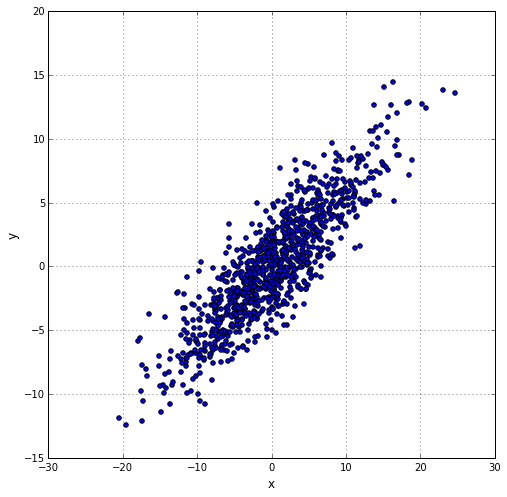

In [2]:
# First generate some data
mu = np.array([0,0])
Sigma = np.array([[ 46.28249177,  26.12496001],
       [ 26.12496001,  19.55457642]])
X = np.random.multivariate_normal(mu,Sigma,1000)
fig = plt.figure(figsize=[8,8])
plt.scatter(X[:,0],X[:,1])
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.grid(axis='both')

In [3]:
# perform PCA
L,U=np.linalg.eig(Sigma)
# eigenvalues
print L
# eigenvectors
U

[ 62.26319119   3.573877  ]


array([[ 0.85305734, -0.52181718],
       [ 0.52181718,  0.85305734]])

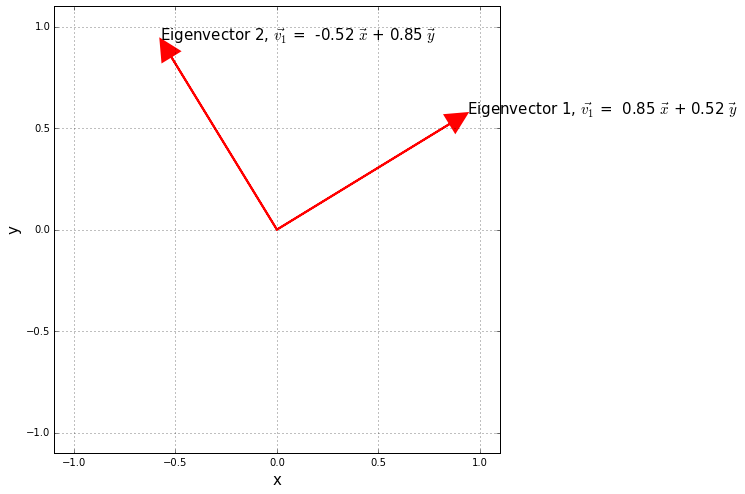

In [4]:
# first plot the eigenvectors
ah=0.1 # size of arrow head
f=1.1 # axes range

plt.figure(figsize=(8,8))
plt.subplot(111,aspect='equal')
plt.arrow(0,0,U[0,0],U[1,0],color='r',linewidth=2,head_width=ah,head_length=ah)
plt.arrow(0,0,U[0,1],U[1,1],color='r',linewidth=2,head_width=ah,head_length=ah)
plt.text(f*U[0,0],f*U[1,0],r'Eigenvector 1, $\vec{v_1}$ =  %.2f $\vec{x}$ + %.2f $\vec{y}$' % (U[0,0],U[1,0]), fontsize=15)
plt.text(f*U[0,1],f*U[1,1],r'Eigenvector 2, $\vec{v_1}$ =  %.2f $\vec{x}$ + %.2f $\vec{y}$' % (U[0,1],U[1,1]), fontsize=15)
plt.xlim([-f,f])
plt.ylim([-f,f])
plt.xlabel('x',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.grid()
plt.show()

In [ ]:
# plot the eigenvectors with the data
plt.figure(figsize=(8,8))
plt.plot(X[:,0],X[:,1],'bo',markersize=5,zorder=1,)
plt.axis('equal')
plt.grid()
plt.title('Principal Components (eigenvectors) of random data', fontsize=12)
plt.xlabel('x', fontsize=12)
plt.ylabel('y', fontsize=12)

plt.arrow(0,0,U[0,0]*sqrt(L[0]),U[1,0]*sqrt(L[0]),color='r',linewidth=2,head_width=1,head_length=1)
plt.arrow(0,0,U[0,1]*sqrt(L[1]),U[1,1]*sqrt(L[1]),color='r',linewidth=2,head_width=1,head_length=1)
plt.show()

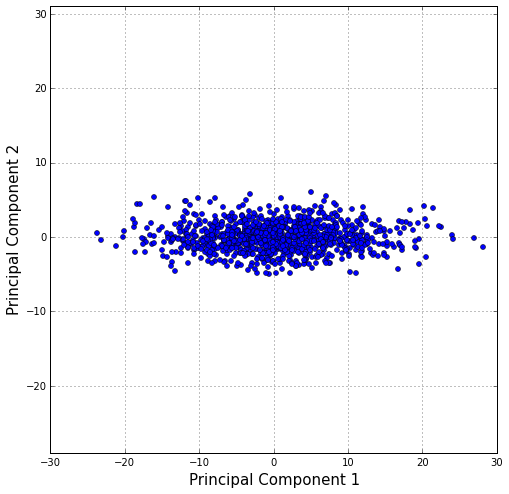

In [5]:
# projecting data onto the principal components (no dimensionality reduction here)
Z = np.dot(X,U)
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.grid()
plt.plot(Z[:,0],Z[:,1],'bo',markersize=5)
plt.xlabel('Principal Component 1',fontsize=15)
plt.ylabel('Principal Component 2',fontsize=15)
plt.show()

## Playing with digit data using PCA

First we will study the impact of PCA on a data belonging to the same class (or digit).

In [ ]:
mat = loadmat('../../homeworks/pa1/basecode/mnist_all.mat') 

In [70]:
#load digit 3 data
digit3data = mat.get('train3')
digit3data = np.array(digit3data,dtype=float)

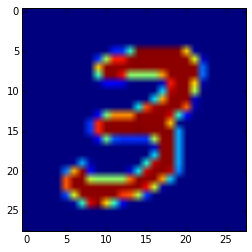

In [71]:
#display a sample image
plt.imshow(np.reshape(digit3data[0,:],((28,28))))

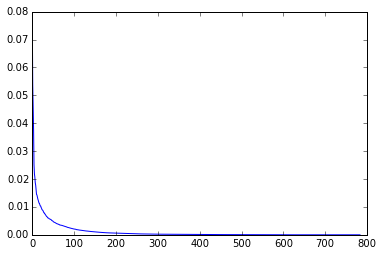

In [72]:
# perform PCA
L = 784
X = scale(digit3data)
pca = PCA(n_components=L)
pca.fit(X)
# first visualize the explained variance
W = pca.components_
plt.plot(pca.explained_variance_ratio_)


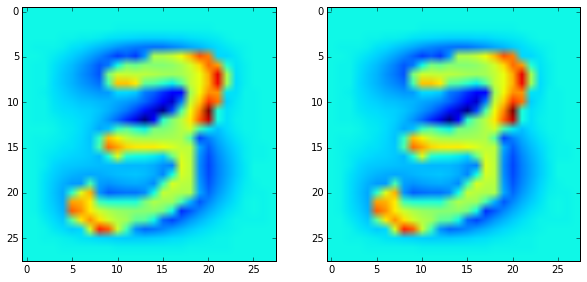

In [73]:
# let us use only the first L principal components to represent one row
# We are reducing the dimensionality from 784 to 1!!!
Z = pca.transform(X)
Xhat = np.dot(Z,W)
fig = plt.figure(figsize=[10,8])
plt.subplot(1,2,1)
plt.imshow(np.reshape(X[0,:],((28,28))))
plt.subplot(1,2,2)
plt.imshow(np.reshape(Xhat[0,:],((28,28))))

Next we will see how PCA allows us to embed data into 2D (or arbitrary low dimensional) space

In [86]:
#load all data
alltraindata = mat.get('train0')
labels = np.zeros([alltraindata.shape[0],1])
for i in range(1,10):
    m = mat.get('train'+str(i))
    alltraindata = np.vstack((alltraindata,m))
    labels = np.vstack((labels,i*np.ones([m.shape[0],1])))
alltraindata = np.array(alltraindata,dtype=float)


In [78]:
# perform PCA
L = 2
X = scale(alltraindata)
pca = PCA(n_components=L)
pca.fit(X)
Z = pca.transform(X)

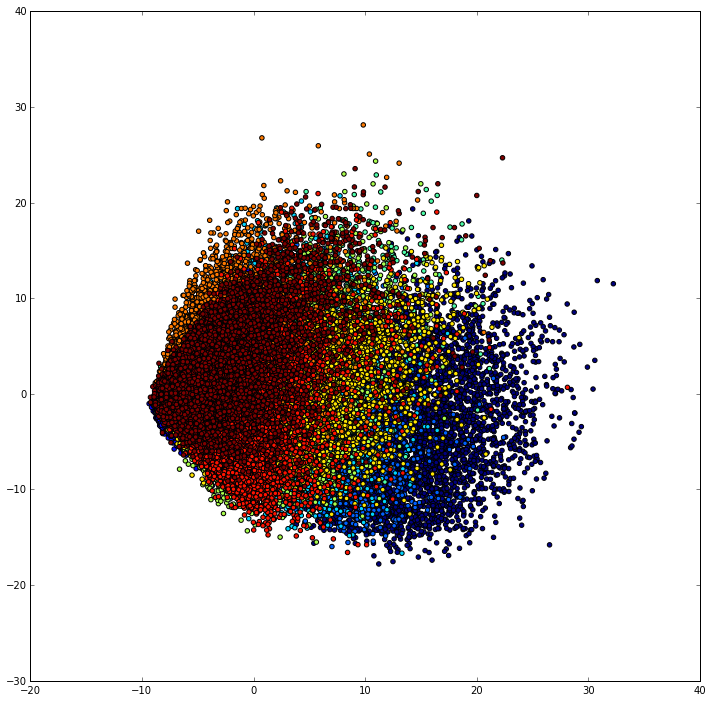

In [91]:
# plot all data in embedded 2D space
fig = plt.figure(figsize=[12,12])
scatter = plt.scatter(Z[:,0],Z[:,1],c=labels)

## Dimensionality Reduction using PCA - Eigen Faces

In [3]:
def image_grid(D,H,W,cols=10,scale=1):
    """ display a grid of images
        H,W: Height and width of the images
        cols: number of columns = number of images in each row
        scale: 1 to fill screen
    """
    n = np.shape(D)[0]
    rows = int(math.ceil((n+0.0)/cols))
    fig = plt.figure(1,figsize=[scale*20.0/H*W,scale*20.0/cols*rows],dpi=300)
    for i in range(n):
        plt.subplot(rows,cols,i+1)
        fig=plt.imshow(np.reshape(D[i,:],[H,W]), cmap = plt.get_cmap("gray"))
        plt.axis('off')

In [4]:
# read face images 
extensions = ['centerlight', 'glasses', 'happy', 'leftlight', 'noglasses', 'normal', 'rightlight', 'sad', 'sleepy', 'surprised', 'wink' ]
basename = '../data/yalefaces/subject'
numimages = 15*len(extensions)
# read one image to get dimensions
m = Image.open(basename+'01.centerlight').convert("L")
r,c = np.shape(m)
X = np.zeros([numimages,r*c])
cnt = 0
for i in range(1,16):
    basename1 = basename+str(i).zfill(2)
    for ex in extensions:
        fullname = basename1+'.'+ex
        m = Image.open(fullname).convert("L")
        X[cnt,:] = np.reshape(np.asarray(m),[1,r*c])
        cnt = cnt + 1

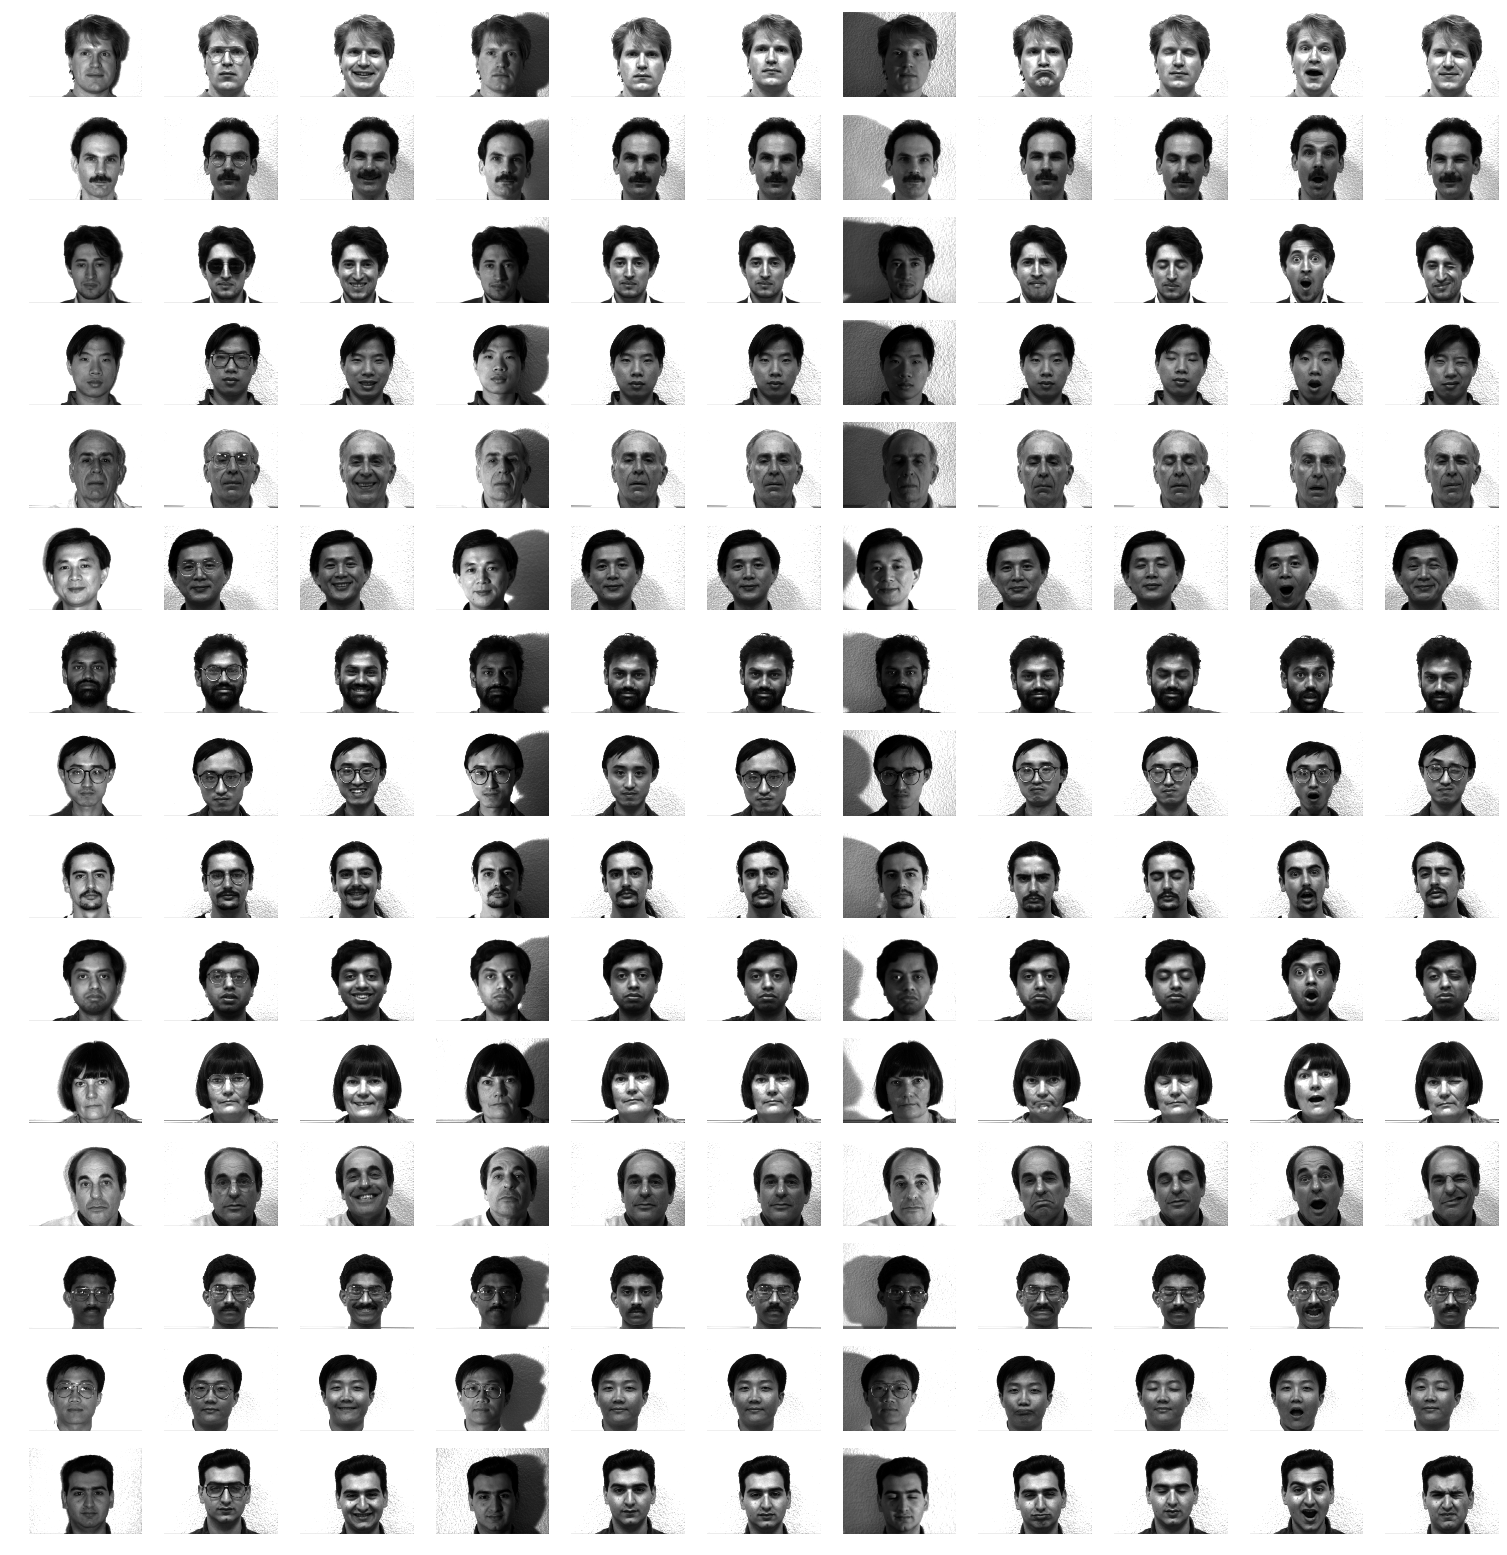

In [5]:
# display raw data using the image_grid function
image_grid(X,r,c,cols=11)

In [6]:
# create a training and test sample
s = np.random.permutation(numimages)
trainX = X[s[0:100],:]
testX = X[s[100:],:]

(-0.5, 319.5, 242.5, -0.5)

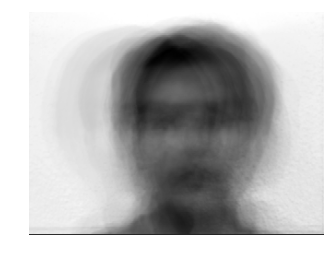

In [14]:
# visualize the mean face
meanTrainFace = np.mean(trainX,axis=0)
fig=plt.imshow(np.reshape(meanTrainFace,[r,c]), cmap = plt.get_cmap("gray"))
plt.axis('off')

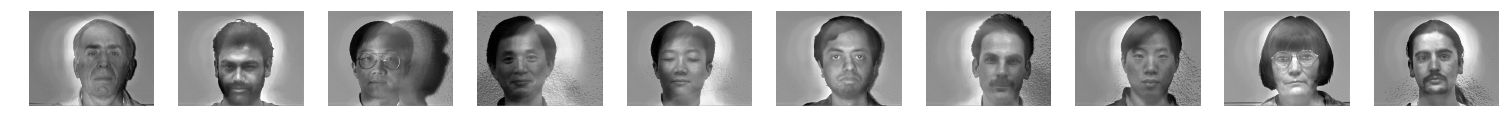

In [15]:
# center data 
trainXcentered = trainX - meanTrainFace

# plot the random 10 centered faces
image_grid(trainXcentered[:10,:],r,c)


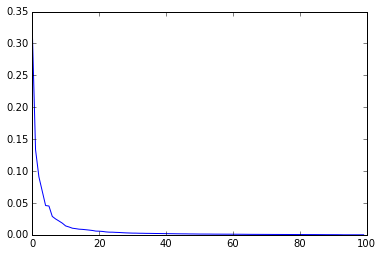

In [16]:
# perform PCA
pca = PCA()
p = pca.fit(trainXcentered)
# first visualize the explained variance
W = p.components_
plt.plot(p.explained_variance_ratio_)


The above plot is also known as a **scree plot**. Typically, the number of principal components chosen ($L$) for dimensionality reduction is obtained by observing the scree plot and identifying the "knee". 

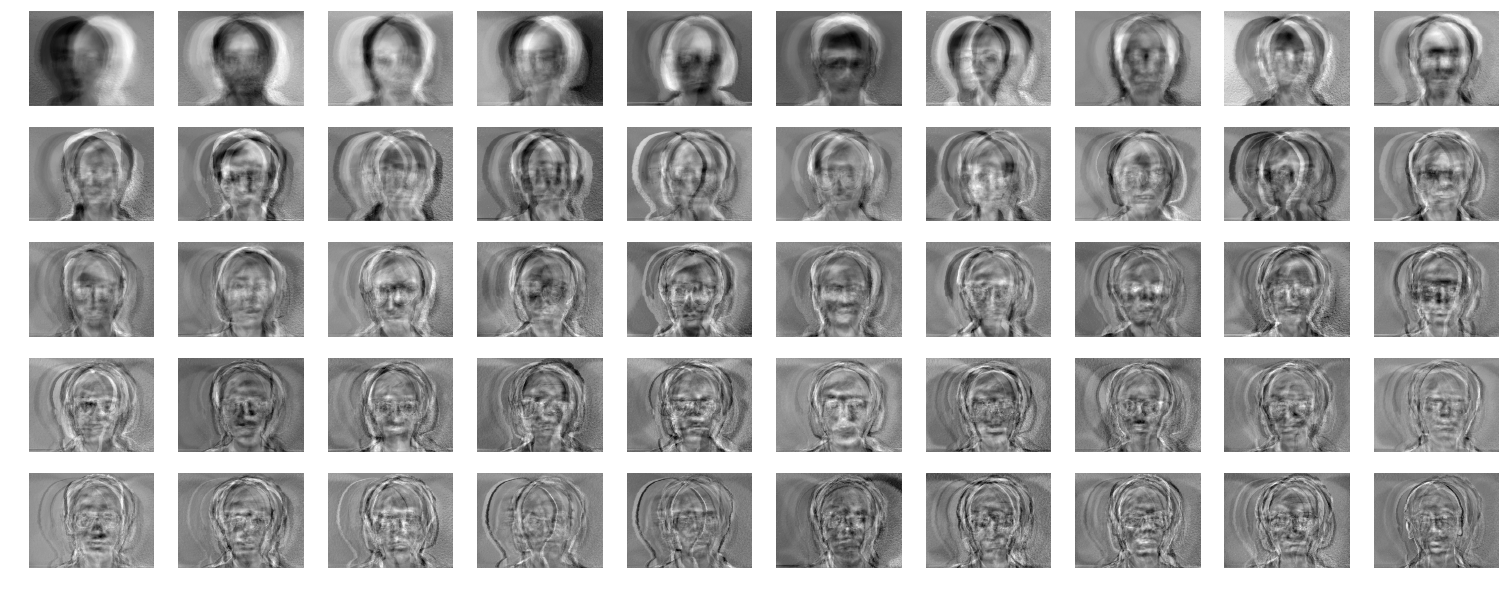

In [17]:
# display the top L eigenfaces
L = 50
image_grid(W[0:L,:],r,c,cols=10)

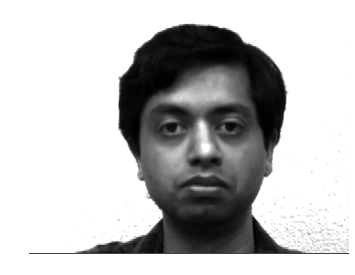

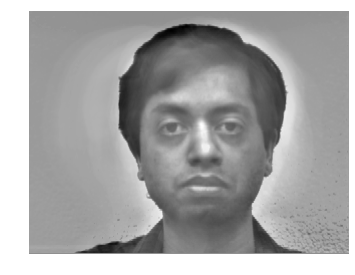

In [21]:
# take a sample test image (unseen)
x = testX[7:8,:]
xcentered = x - meanTrainFace
 
image_grid(x,r,c,cols=4)
plt.show()
image_grid(xcentered,r,c,cols=4)

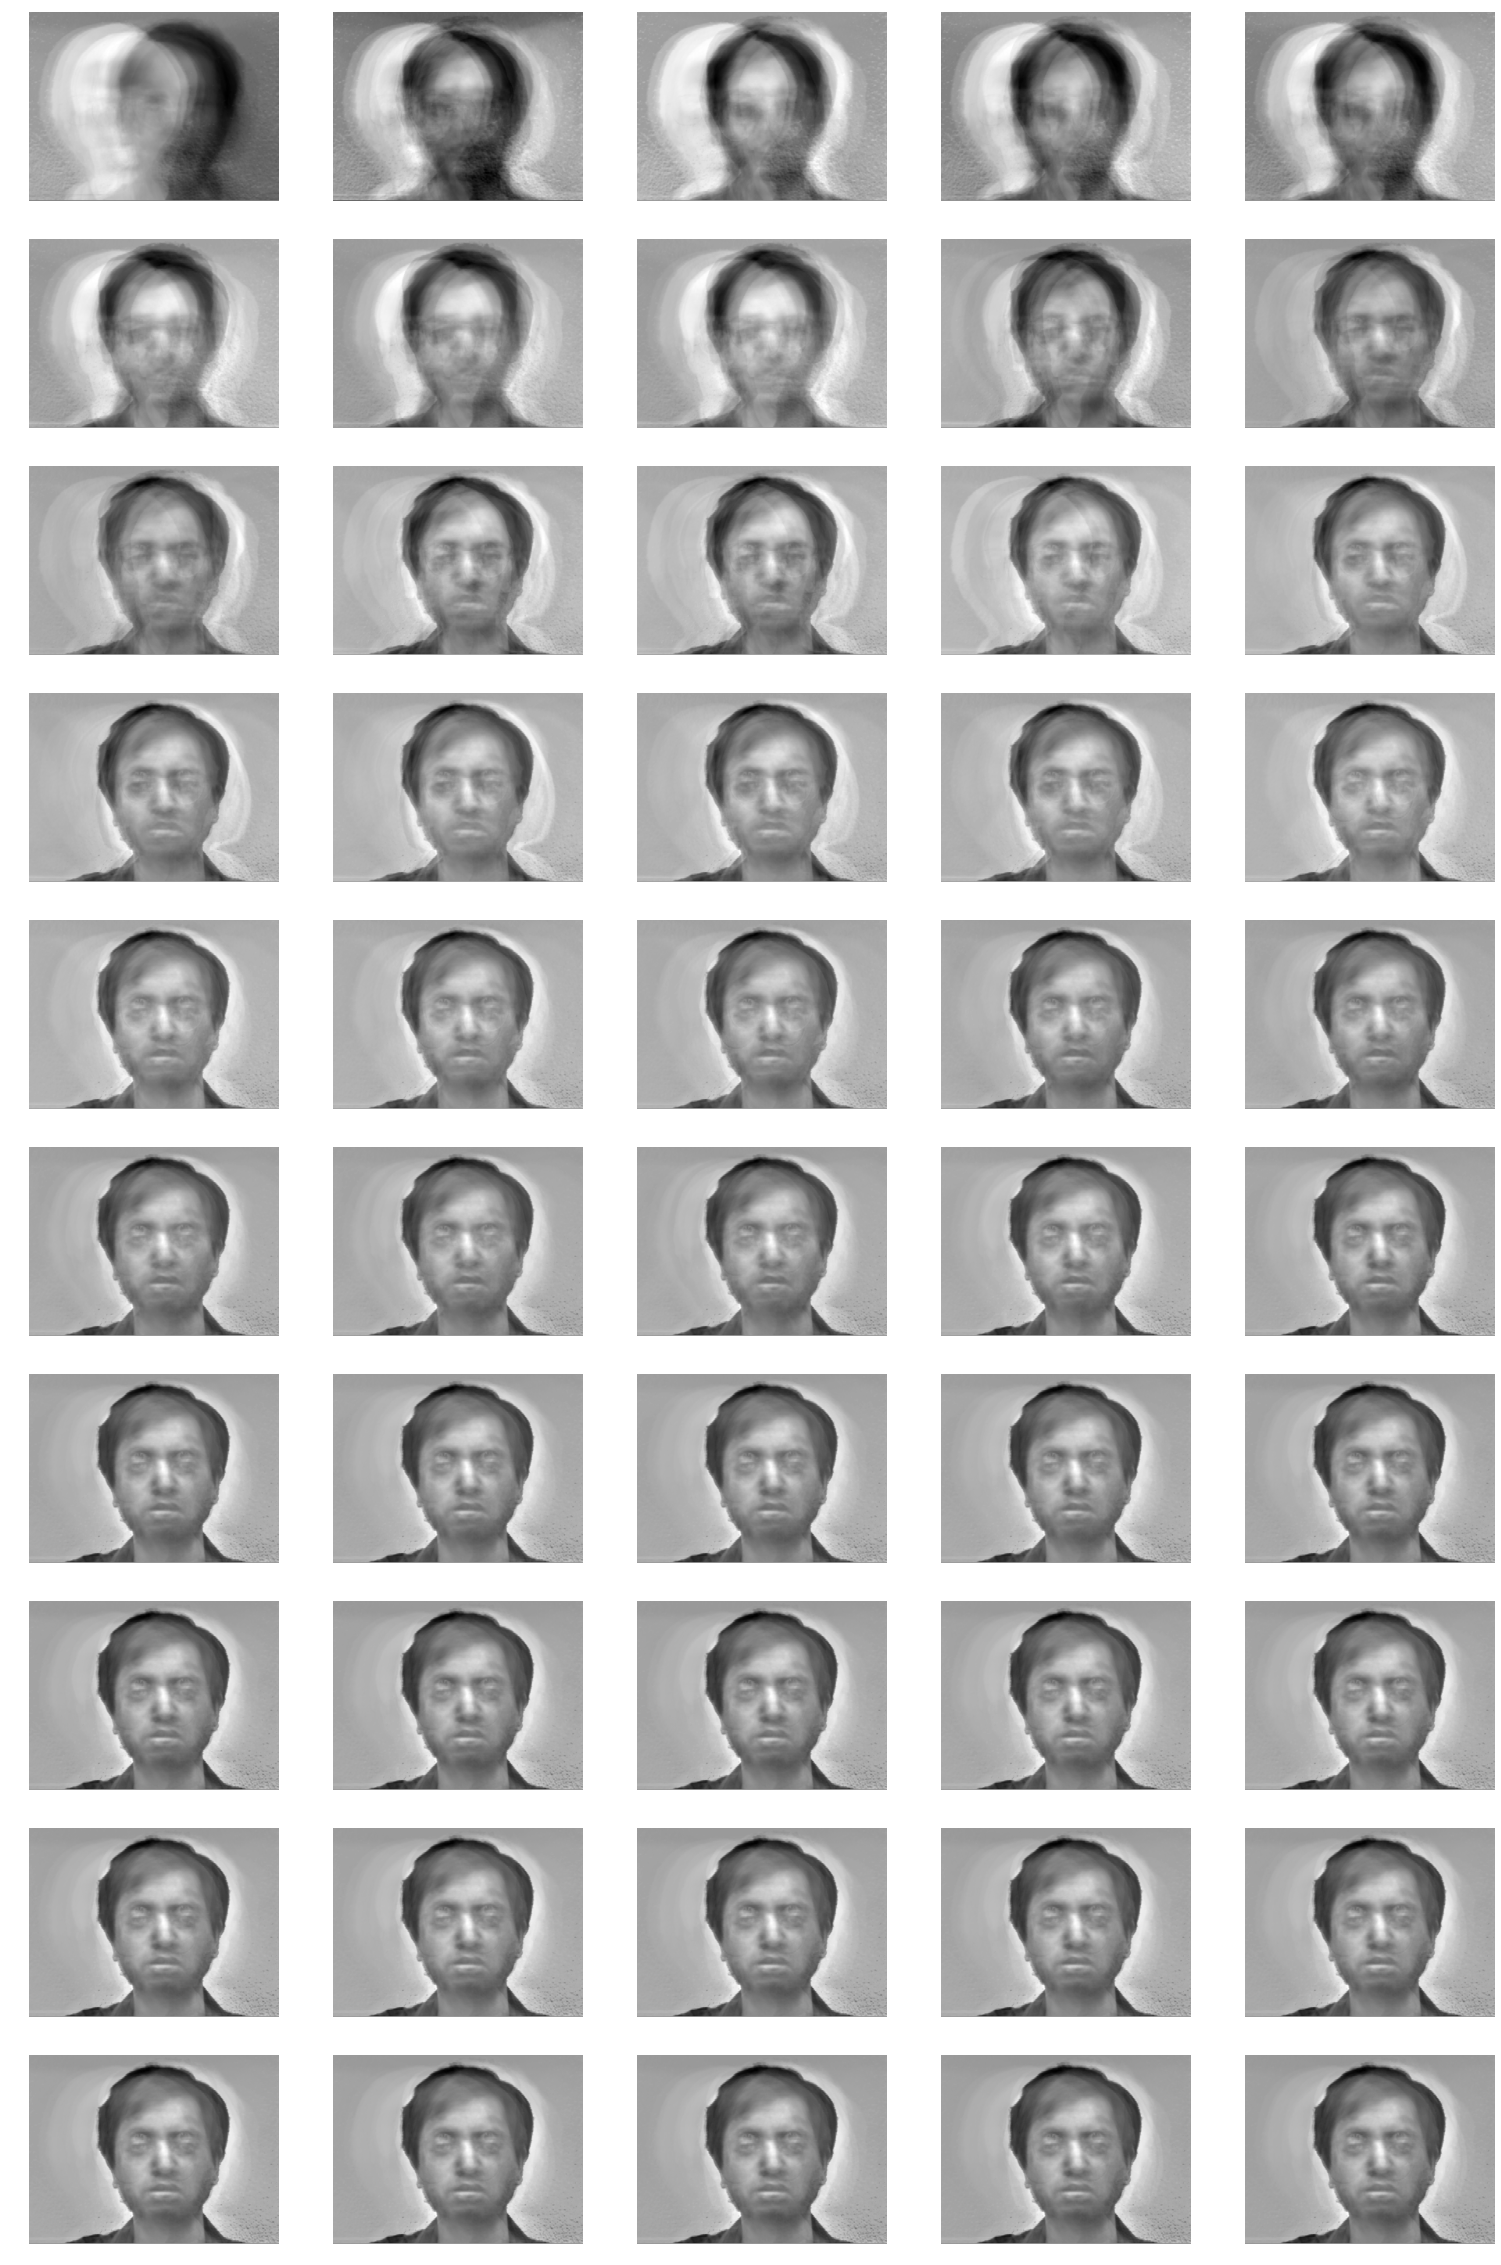

In [22]:
#reconstruct the test image using top $L$ principal components. 
Xhat = np.zeros([L,xcentered.shape[1]])
for i in range(L):
    z = np.dot(W[0:i+1,:],xcentered.transpose())
    Xhat[i,:] = np.dot(z.transpose(),W[0:i+1,:])

image_grid(Xhat,r,c,cols=5)